In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
def f_003_07(v, f, p):
    
    # Parameter list    
    ko, E_R, A, Vmax, CpA, CpI, DHrA, CpB, \
              Cao, Fao, Fio, U, Tj, caso = p
    # Dependent variables
    Xa, T = f

    k = ko * np.exp(-E_R/T)
    cA = Cao*(1-Xa)
    Fa = Fao*(1-Xa)
    Fb = Fao*Xa
    ra = - k * cA**2

    # ODE system
    dX_dv = - ra/Fao
    
    if caso == 1:
        U = 0
    dT_dv = (U*(Tj-T)*A/Vmax + DHrA * ra)/(Fa*CpA+Fio*CpI+Fb*CpB)

    return [dX_dv, dT_dv]

def createfig(v, y, Title):
    fig, ax1 = plt.subplots(figsize=(6, 5))
    ax1.plot(v, y[0], ls='-.', color='red')
    ax1.set_xlabel('Reactor volume [m$^3$]')
    ax1.set_ylabel('Conversion ($X_A$)')
    ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax2 = ax1.twinx()
    ax2.plot(v, y[1])
    ax2.set_ylabel('Reaction temperature [K]')

    plt.tight_layout()
    plt.title(Title)
    plt.show()

In [4]:
Qin = 1        # Caudal de entrada, L/s
To = 400       # Temperatura de alimentacion, K
CpA = 100      # Cp de A, J/mol/K
CpB = 100      # Cp de B, J/mol/K
CpI = 200      # Cp del inerte, J/mol/K
wA = 0.8       # Fraccion masica de A
wI = 0.2       # Fraccion masica del inerte
MA = 160       # Peso molecular de A
MI = 80        # Peso molecular del inerte
Ftot = 1       # Flujo masico total, kg/s
DHrA = 20000   # Calor de reaccion por mol de A, J/mol A
ko = 1.e4      # Factor preexponencial
E_R = 9000     # Energia de activacion divida por R
U = 3e2        # Coeficiente de transferencia global, W/m^2-K
A = 2          # Area de transferencia m^2 por m^3 de PFR
Vmax = 1       # Volumen del reactor, m^3
Tj = 500       # Temperatura de fluido de intercambiado de calor, K

# Calculo de los flujos molares iniciales [mol/s]
Fao = Ftot * 1000 * wA / MA    # mol/s
Fio = Ftot * 1000 * wI / MI    # mol/s
Cao = Fao/(Qin*0.001)          # mol/m^3

# Under an adiabatic process

In [5]:
caso = 1 
parametros = [ko, E_R, A, Vmax, CpA, CpI, DHrA, CpB, \
              Cao, Fao, Fio, U, Tj, caso] 
vVr = [0, 1] 
ics = [0, To]  # initial conditions 

fun = lambda v, F: f_003_07(v,F,parametros)
solution = solve_ivp(fun, vVr, ics, t_eval=np.linspace(0, 1, 100)) 

In [6]:
print('Part a: The outlet temperature is {:1.0f} K and\n' \
     ' conversion del {:1.1f}%'.format(solution.y[1,-1],solution.y[0,-1]*100))

Part a: The outlet temperature is 351 K and
 conversion del 48.9%


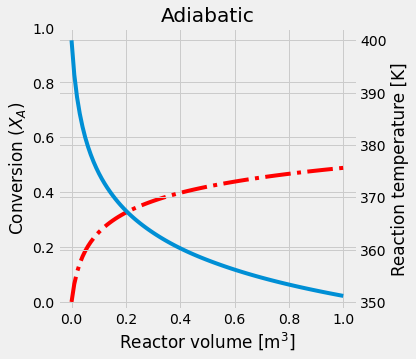

In [7]:
createfig(solution.t, solution.y, 'Adiabatic')

In [8]:
caso = 2 
parametros[-1] = caso

Part b: The outlet temperature is 394 K and
 conversion del 76.5%


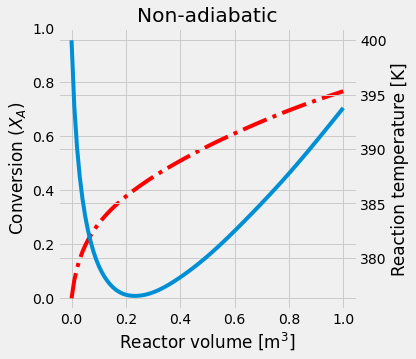

In [9]:
fun = lambda v, F: f_003_07(v,F,parametros)
solution = solve_ivp(fun, vVr, ics, t_eval=np.linspace(0, 1, 100)) 

print('Part b: The outlet temperature is {:1.0f} K and\n' \
     ' conversion del {:1.1f}%'.format(solution.y[1,-1],solution.y[0,-1]*100))

createfig(solution.t, solution.y, 'Non-adiabatic')